# Splicing profile comparison

In [2]:
import pandas as pd
import numpy as np
import math
import re

## Load the tables containing information about CYP genes

In [3]:
# DONOR 1
d1_cyp = pd.read_excel("sum_cyp_donor1.xlsx", usecols =['GeneID', 'TPM', 'NumSplVar'])
d1_cyp

,GeneID,TPM,NumSplVar
0,CYP11A1,0.439078,1
1,CYP17A1,0.393462,1
2,CYP1A1,1.184891,1
3,CYP1A2,31.211832,1
4,CYP1B1,0.386888,1
5,CYP20A1,1.033129,1
6,CYP21A2,0.385102,1
7,CYP26A1,1.126447,2
8,CYP27A1,19.835692,1
9,CYP27B1,0.181156,1


In [4]:
d1_cyp[d1_cyp.NumSplVar == 5]

,GeneID,TPM,NumSplVar
15,CYP2C8,51.970090,5
29,CYP4A22,46.039114,5


In [5]:
# DONOR 3
d3_cyp = pd.read_excel("sum_cyp_donor3.xlsx", usecols =['GeneID', 'TPM', 'NumSplVar'])
d3_cyp

,GeneID,TPM,NumSplVar
0,CYP17A1,3.718151,1
1,CYP1A1,0.464261,1
2,CYP1A2,13.645596,1
3,CYP1B1,1.099442,1
4,CYP20A1,0.688493,1
5,CYP26A1,1.642715,1
6,CYP27A1,23.265510,1
7,CYP2A13,4.127144,1
8,CYP2A6,325.978885,1
9,CYP2A7,169.442857,2


In [6]:
# DONOR 5
d5_cyp = pd.read_excel("sum_cyp_donor5.xlsx", usecols =['GeneID', 'TPM', 'NumSplVar'])
d5_cyp

,GeneID,TPM,NumSplVar
0,CYP1A1,20.995387,3
1,CYP1A2,85.875475,1
2,CYP1B1,0.145223,1
3,CYP20A1,1.246779,1
4,CYP26A1,1.425767,1
5,CYP27A1,22.178425,1
6,CYP2A6,43.212049,1
7,CYP2A7,21.038267,2
8,CYP2B6,29.662807,1
9,CYP2C18,13.423599,2


In [ ]:
d5_cyp[d5_cyp['GeneID'].str.contains(r'1A2')]
# 1A2 - 1 (1)
# 2A6 - 1 (1)
# 2B6 - 1 (1)
# 2C8 - 1 (8)
# 2C9 - 1 (2)
# 2C19 - 1 (2)
# 2D6 - 1 (2)
# 2E1 - 1 (3)
# 2J2 - 1 (1)
# 3A4 - 2 (4 AND 1)
# 3A5 - YES (1)

In [7]:
# HEPG 2
hep_cyp = pd.read_excel("sum_cyp_hep.xlsx", usecols =['GeneID', 'TPM', 'NumSplVar'])
hep_cyp

,GeneID,TPM,NumSplVar
0,CYP19A1,1.039325,1
1,CYP1A1,4.348322,2
2,CYP20A1,3.868657,1
3,CYP24A1,19.120730,3
4,CYP27A1,6.401873,1
5,CYP27B1,0.406816,1
6,CYP2S1,4.077868,2
7,CYP2W1,7.003470,2
8,CYP3A5,0.587254,1
9,CYP3A7,0.471986,1


## Search for CYP genes sharing the same number of splice variants among all the samples (liver tissue and HepG2)

In [11]:
sim = d1_cyp.merge(d3_cyp.merge(d5_cyp.merge(hep_cyp, on =['GeneID', 'NumSplVar']),on =['GeneID', 'NumSplVar']), on =['GeneID', 'NumSplVar'])
sim.columns = ['GeneID','TPM_D1','NumSplVar_D1',
                    'TPM_D3','TPM_D5','TPM_HepG2']
sim

,GeneID,TPM_D1,NumSplVar_D1,TPM_D3,TPM_D5,TPM_HepG2
0,CYP20A1,1.033129,1,0.688493,1.246779,3.868657
1,CYP27A1,19.835692,1,23.265510,22.178425,6.401873
2,CYP51A1,1.475462,1,8.648996,3.131426,0.594329


## Search for CYP genes sharing the same number of splice variants among the liver tissue samples

In [13]:
sim_don = d1_cyp.merge(d3_cyp.merge(d5_cyp, on =['GeneID', 'NumSplVar']), on =['GeneID', 'NumSplVar'])
sim_don.columns = ['GeneID','TPM_D1','NumSplVar',
                     'TPM_D3','TPM_D5']
sim_don

,GeneID,TPM_D1,NumSplVar,TPM_D3,TPM_D5
0,CYP1A2,31.211832,1,13.645596,85.875475
1,CYP1B1,0.386888,1,1.099442,0.145223
2,CYP20A1,1.033129,1,0.688493,1.246779
3,CYP27A1,19.835692,1,23.265510,22.178425
4,CYP2A6,112.449099,1,325.978885,43.212049
5,CYP2A7,61.425438,2,169.442857,21.038267
6,CYP2C18,26.302304,2,29.797551,13.423599
7,CYP2C9,143.523590,2,52.535793,85.624194
8,CYP2R1,0.580976,1,2.190653,0.524753
9,CYP39A1,14.399114,2,14.624317,18.199072


In [14]:
cross_corr_sim_don = sim_don.corr(method = 'pearson')
cross_corr_sim_don

,TPM_D1,NumSplVar,TPM_D3,TPM_D5
TPM_D1,1.000000,0.757753,0.465615,0.869485
NumSplVar,0.757753,1.000000,0.051431,0.801684
TPM_D3,0.465615,0.051431,1.000000,0.118995
TPM_D5,0.869485,0.801684,0.118995,1.000000


## Search for CYP genes sharing the same GeneID among all the samples (liver tissue and HepG2)

In [77]:
sim_1 = d1_cyp.merge(d3_cyp.merge(d5_cyp.merge(hep_cyp, on =['GeneID']),on =['GeneID']), on =['GeneID'])
sim_1.columns = ['GeneID','TPM_D1','NumSplVar_D1',
                     'TPM_D3','NumSplVar_D3','TPM_D5','NumSplVar_D5','TPM_HepG2','NumSplVar_HepG2']
sim_1

,GeneID,TPM_D1,NumSplVar_D1,TPM_D3,NumSplVar_D3,TPM_D5,NumSplVar_D5,TPM_HepG2,NumSplVar_HepG2
0,CYP1A1,1.184891,1,0.464261,1,20.995387,3,4.348322,2
1,CYP20A1,1.033129,1,0.688493,1,1.246779,1,3.868657,1
2,CYP27A1,19.835692,1,23.265510,1,22.178425,1,6.401873,1
3,CYP3A5,7.998993,3,6.161710,2,8.006627,3,0.587254,1
4,CYP3A7,2.112593,2,1.791808,1,1.579276,1,0.471986,1
5,CYP4F11,13.458349,4,15.591068,2,8.070536,4,3.564935,2
6,CYP4F12,4.733557,2,13.793107,2,5.386361,1,0.741831,1
7,CYP4F2,26.081391,3,37.106335,2,11.910970,2,0.817871,1
8,CYP4F3,16.020012,3,18.535233,3,10.346667,2,0.539202,1
9,CYP51A1,1.475462,1,8.648996,1,3.131426,1,0.594329,1


In [37]:
# sim_1.to_excel("CYP_sim.xlsx") 

In [16]:
sim_don_1 = sim_don = d1_cyp.merge(d3_cyp.merge(d5_cyp, on =['GeneID']), on =['GeneID'])
sim_don_1.columns = ['GeneID', 'TPM_D1', 'NumSplVar_D1',
                     'TPM_D3', 'NumSplVar_D3', 'TPM_D5', 'NumSplVar_D5']
sim_don_1

,GeneID,TPM_D1,NumSplVar_D1,TPM_D3,NumSplVar_D3,TPM_D5,NumSplVar_D5
0,CYP1A1,1.184891,1,0.464261,1,20.995387,3
1,CYP1A2,31.211832,1,13.645596,1,85.875475,1
2,CYP1B1,0.386888,1,1.099442,1,0.145223,1
3,CYP20A1,1.033129,1,0.688493,1,1.246779,1
4,CYP26A1,1.126447,2,1.642715,1,1.425767,1
5,CYP27A1,19.835692,1,23.265510,1,22.178425,1
6,CYP2A6,112.449099,1,325.978885,1,43.212049,1
7,CYP2A7,61.425438,2,169.442857,2,21.038267,2
8,CYP2B6,73.767826,2,42.209227,1,29.662807,1
9,CYP2C18,26.302304,2,29.797551,2,13.423599,2


In [78]:
cross_corr_sim = sim.corr(method = 'pearson')
cross_corr_sim

,TPM_D1,NumSplVar_D1,TPM_D3,TPM_D5,TPM_HepG2
TPM_D1,1.000000,NaN,0.944610,0.998149,0.815180
NumSplVar_D1,NaN,NaN,NaN,NaN,NaN
TPM_D3,0.944610,NaN,1.000000,0.962822,0.579936
TPM_D5,0.998149,NaN,0.962822,1.000000,0.778444
TPM_HepG2,0.815180,NaN,0.579936,0.778444,1.000000


## There is no significat difference between the expression of CYP genes sharing the same splicing profile

In [22]:
import scipy.stats as stats

In [81]:
fvalue, pvalue = stats.f_oneway(sim['TPM_D1'], sim['TPM_D3'], sim['TPM_D5'])
print(fvalue, pvalue)

0.06991282258159742 0.9332234337964778


In [83]:
fvalue, pvalue = stats.f_oneway(sim_don['TPM_D1'], sim_don['TPM_D3'], sim_don['TPM_D5'])
print(fvalue, pvalue)

0.1146078953771161 0.8919936268511751


In [23]:
# Вероятно, можно сделать вывод, что профили сплайсинга в донорах скорее различаются,
# учитывая, что при сравнении трех доноров по генам и их числу сплайс-вариантов, только у 3 генов на все 3 донора они схожи

In [27]:
transcr = pd.DataFrame({'Sample': ['Donor1', 'Donor3', 'Donor5', 'HepG2'],
                       'Number of transcripts': [19675, 14858, 16711, 18918]})
genes = pd.DataFrame({'Sample': ['Donor1', 'Donor3', 'Donor5', 'HepG2'],
                       'Number of genes': [11665, 9683, 10794, 10794]})

In [28]:
df = pd.merge(transcr, genes, on = 'Sample')
df

,Sample,Number of transcripts,Number of genes
0,Donor1,19675,11665
1,Donor3,14858,9683
2,Donor5,16711,10794
3,HepG2,18918,10794


In [29]:
import matplotlib as plt

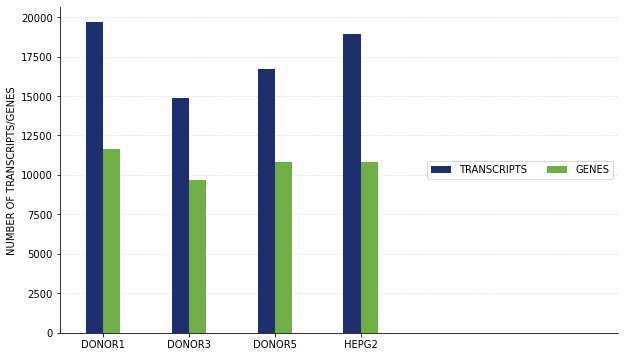

In [31]:
# ALL THE PROTEIN CODING GENES
fig, ax = plt.subplots(1, figsize=(10, 6))

# numerical x
x = np.arange(len(labels))



labels = ['DONOR1', 'DONOR3', 'DONOR5', 'HEPG2']
transcr = [19675, 14858, 16711, 18918]
genes = [11665, 9683, 10794, 10794]

# plot bars
plt.bar(x - 0.1, transcr, width = 0.2, color = '#1D2F6F')
#plt.bar(x - 0., sizes_d3, width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, genes, width = 0.2, color = '#6EAF46')
#plt.bar(x + 0.3, sizes_hep, width = 0.2, color = '#FAC748')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# x y details
plt.ylabel('NUMBER OF TRANSCRIPTS/GENES')
plt.xticks(x, labels)
plt.xlim( -0.5, 6)

# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color = 'gray', linestyle = 'dashed', alpha = 0.2)
# title and legend
#plt.title('PHARMACOGENES ')
plt.legend(['TRANSCRIPTS', 'GENES'], loc='right', ncol = 4)
#plt.show()
plt.savefig('Non_zero_transcripts_genes_summary.png', bbox_inches = "tight")

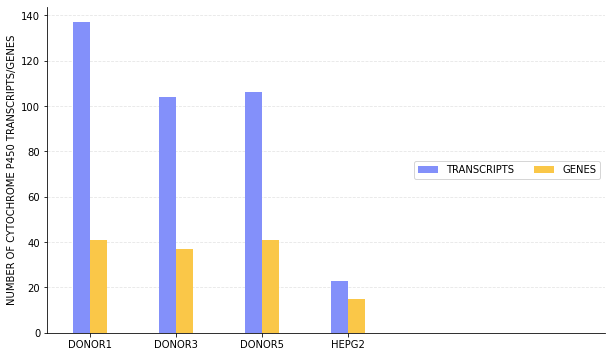

In [58]:
# ALL THE PROTEIN CODING GENES
fig, ax = plt.subplots(1, figsize=(10, 6))

# numerical x
x = np.arange(len(labels))




labels = ['DONOR1', 'DONOR3', 'DONOR5', 'HEPG2']
transcr = [137, 104, 106, 23]
genes = [41, 37, 41, 15]

# plot bars
plt.bar(x - 0.1, transcr, width = 0.2, color = '#8390FA')
#plt.bar(x - 0., sizes_d3, width = 0.2, color ='#1D2F6F')
plt.bar(x + 0.1, genes, width = 0.2, color = '#FAC748')
#plt.bar(x + 0.3, sizes_hep, width = 0.2, color = '#6EAF46')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# x y details
plt.ylabel('NUMBER OF CYTOCHROME P450 TRANSCRIPTS/GENES')
plt.xticks(x, labels)
plt.xlim( -0.5, 6)

# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color = 'gray', linestyle = 'dashed', alpha = 0.2)
# title and legend
#plt.title('PHARMACOGENES ')
plt.legend(['TRANSCRIPTS', 'GENES'], loc='right', ncol = 4)
#plt.show()
plt.savefig('CYP_genes_summary.png', bbox_inches = "tight")

In [32]:
pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
from matplotlib import pyplot as plt

In [35]:
d1_cyp['NumSplVar'] = d1_cyp['NumSplVar'].map(str)

In [40]:
d3_cyp['NumSplVar'] = d3_cyp['NumSplVar'].map(str)
d5_cyp['NumSplVar'] = d5_cyp['NumSplVar'].map(str)

In [36]:
d1_cyp["GrOup"] = d1_cyp["GeneID"] + d1_cyp["NumSplVar"]

In [41]:
d3_cyp["GrOup"] = d3_cyp["GeneID"] + d3_cyp["NumSplVar"]
d5_cyp["GrOup"] = d5_cyp["GeneID"] + d5_cyp["NumSplVar"]

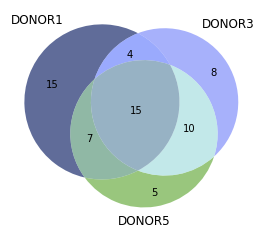

In [55]:
venn3([set(d1_cyp['GrOup']),set(d3_cyp['GrOup']),set(d5_cyp['GrOup'])], set_labels=('DONOR1', 'DONOR3', 'DONOR5'), 
      set_colors = ('#1D2F6F', '#8390FA', '#6EAF46'), alpha = 0.7) # сonsidering num of splice variants
plt.savefig('Similar_CYP_Spl.png')

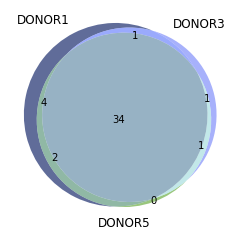

In [60]:
venn3([set(d1_cyp['GeneID']),set(d3_cyp['GeneID']),set(d5_cyp['GeneID'])], set_labels=('DONOR1', 'DONOR3', 'DONOR5'), 
      set_colors = ('#1D2F6F', '#8390FA', '#6EAF46'), alpha = 0.7) # considering only GeneID
plt.savefig('Similar_CYP_Genes.png')

# Pharmacogenes

In [24]:
pg_hep = pd.read_excel("Pharmacogenes_hepg2.xlsx", usecols =['GeneID', 'TPM', 'NumSplVar'])
pg_hep

,GeneID,TPM,NumSplVar
0,APOA2,12818.167289,7
1,RPL13,4061.623540,5
2,ALB,3962.604957,7
3,APOA1,1817.734083,5
4,SERPINA1,787.036843,7
...,...,...,...
193,CHST9,0.155138,1
194,MTHFR,0.127063,1
195,ABCC9,0.109987,1
196,AKAP9,0.091771,1


In [25]:
pg_d1 = pd.read_excel("Pharmacogenes_d1.xlsx", usecols =['GeneID', 'TPM', 'NumSplVar'])
pg_d1

,GeneID,TPM,NumSplVar
0,ABCA1,1.324516,1
1,ABCB1,0.644505,2
2,ABCB10,1.911971,1
3,ABCB11,18.809657,3
4,ABCB4,14.105894,5
...,...,...,...
263,UGT2B7,408.801121,4
264,VKORC1,166.993086,4
265,XDH,6.330671,1
266,XRCC1,0.440840,1


In [26]:
pg_d3 = pd.read_excel("Pharmacogenes_d3.xlsx", usecols =['GeneID', 'TPM', 'NumSplVar'])
pg_d3


,GeneID,TPM,NumSplVar
0,ABCA1,0.860331,1
1,ABCB1,1.336384,1
2,ABCB10,3.924088,1
3,ABCB11,8.419488,2
4,ABCB4,7.206768,2
...,...,...,...
232,UGT2B4,166.211823,2
233,UGT2B7,310.732136,3
234,VKORC1,185.541721,2
235,XDH,4.397608,1


In [27]:
pg_d5 = pd.read_excel("Pharmacogenes_d5.xlsx", usecols =['GeneID', 'TPM', 'NumSplVar'])
pg_d5

,GeneID,TPM,NumSplVar
0,ABCA1,2.272793,1
1,ABCB1,0.232814,1
2,ABCB10,0.797424,1
3,ABCB11,33.634978,2
4,ABCB4,20.224449,3
...,...,...,...
243,UGT2B4,106.920357,2
244,UGT2B7,256.776959,3
245,VKORC1,137.767532,4
246,XDH,6.204770,1


## Search for pharmacogenes sharing the same number of splice variants among all the samples (liver tissue and HepG2)

In [28]:
sim_pg = pg_d1.merge(pg_d3.merge(pg_d5.merge(pg_hep, on =['GeneID', 'NumSplVar']),on =['GeneID', 'NumSplVar']), on =['GeneID', 'NumSplVar'])
sim_pg.columns = ['GeneID','TPM_D1','NumSplVar',
                     'TPM_D3','TPM_D5','TPM_HepG2']

In [29]:
sim_pg

,GeneID,TPM_D1,NumSplVar,TPM_D3,TPM_D5,TPM_HepG2
0,ABCA1,1.324516,1,0.860331,2.272793,0.594885
1,ABCB10,1.911971,1,3.924088,0.797424,4.293655
2,ABCB9,0.282005,1,0.196733,0.216445,0.721114
3,ADH5,48.601091,2,37.117913,34.076317,36.278363
4,ALDH1A1,222.319357,1,209.486263,221.480991,79.031135
5,ALDH4A1,39.684549,3,37.475867,36.070351,34.341904
6,ALDH6A1,25.729281,2,17.293580,23.571264,3.090292
7,APOA1,16038.633868,5,25975.453829,13991.793070,1817.734083
8,APOA4,8.500520,1,5.368087,1.772653,0.707013
9,APOB,118.513792,2,124.654410,89.141356,105.341590


In [30]:
cross_corr_pg = sim_pg.corr(method = 'pearson')
cross_corr_pg

,TPM_D1,NumSplVar,TPM_D3,TPM_D5,TPM_HepG2
TPM_D1,1.000000,0.584787,0.991845,0.997850,0.972984
NumSplVar,0.584787,1.000000,0.630445,0.570593,0.662760
TPM_D3,0.991845,0.630445,1.000000,0.986783,0.989296
TPM_D5,0.997850,0.570593,0.986783,1.000000,0.962650
TPM_HepG2,0.972984,0.662760,0.989296,0.962650,1.000000


## Search for pharmacogenes sharing the same GeneID among the samples (liver tissue and HepG2)

In [31]:
sim_pg_1 = pg_d1.merge(pg_d3.merge(pg_d5.merge(pg_hep, on =['GeneID']),on =['GeneID']), on =['GeneID'])
sim_pg_1.columns = ['GeneID','TPM_D1','NumSplVar_D1',
                     'TPM_D3','NumSplVar_D3','TPM_D5','NumSplVar_D5','TPM_HepG2','NumSplVar_HepG2']

In [32]:
sim_pg_1

,GeneID,TPM_D1,NumSplVar_D1,TPM_D3,NumSplVar_D3,TPM_D5,NumSplVar_D5,TPM_HepG2,NumSplVar_HepG2
0,ABCA1,1.324516,1,0.860331,1,2.272793,1,0.594885,1
1,ABCB1,0.644505,2,1.336384,1,0.232814,1,0.475881,2
2,ABCB10,1.911971,1,3.924088,1,0.797424,1,4.293655,1
3,ABCB4,14.105894,5,7.206768,2,20.224449,3,1.395737,1
4,ABCB7,1.392827,3,2.655841,3,3.162765,3,1.880302,2
...,...,...,...,...,...,...,...,...,...
146,UGT2B11,3.955986,1,1.773742,1,4.479992,1,0.465371,1
147,UGT2B4,136.385091,2,166.211823,2,106.920357,2,1.088604,1
148,UGT2B7,408.801121,4,310.732136,3,256.776959,3,22.610431,4
149,VKORC1,166.993086,4,185.541721,2,137.767532,4,220.669796,4


## Search for pharmacogenes sharing the same number of splice variants among the liver tissue samples

In [33]:
sim_pg_d = pg_d1.merge(pg_d3.merge(pg_d5, on =['GeneID', 'NumSplVar']), on =['GeneID', 'NumSplVar'])
sim_pg_d.columns = ['GeneID','TPM_D1','NumSplVar',
                     'TPM_D3','TPM_D5']
sim_pg_d

,GeneID,TPM_D1,NumSplVar,TPM_D3,TPM_D5
0,ABCA1,1.324516,1,0.860331,2.272793
1,ABCB10,1.911971,1,3.924088,0.797424
2,ABCB7,1.392827,3,2.655841,3.162765
3,ABCB9,0.282005,1,0.196733,0.216445
4,ABCC10,0.238371,1,2.319333,1.531783
...,...,...,...,...,...
109,UGT2B11,3.955986,1,1.773742,4.479992
110,UGT2B15,137.727368,1,81.176649,106.544743
111,UGT2B17,2.735296,1,2.391693,31.196550
112,UGT2B4,136.385091,2,166.211823,106.920357


## Search for pharmacogenes sharing the same GeneID among the liver tissue samples

In [34]:
sim_pg_d_1 = pg_d1.merge(pg_d3.merge(pg_d5, on =['GeneID']), on =['GeneID'])
sim_pg_d_1.columns = ['GeneID','TPM_D1','NumSplVar_D1',
                     'TPM_D3','NumSplVar_D3','TPM_D5','NumSplVar_D5']
sim_pg_d_1

,GeneID,TPM_D1,NumSplVar_D1,TPM_D3,NumSplVar_D3,TPM_D5,NumSplVar_D5
0,ABCA1,1.324516,1,0.860331,1,2.272793,1
1,ABCB1,0.644505,2,1.336384,1,0.232814,1
2,ABCB10,1.911971,1,3.924088,1,0.797424,1
3,ABCB11,18.809657,3,8.419488,2,33.634978,2
4,ABCB4,14.105894,5,7.206768,2,20.224449,3
...,...,...,...,...,...,...,...
211,UGT2B4,136.385091,2,166.211823,2,106.920357,2
212,UGT2B7,408.801121,4,310.732136,3,256.776959,3
213,VKORC1,166.993086,4,185.541721,2,137.767532,4
214,XDH,6.330671,1,4.397608,1,6.204770,1


## There is no significat difference between the expression of pharmacigenes sharing the same splicing profile

In [36]:
fvalue, pvalue = stats.f_oneway(sim_pg_d['TPM_D1'], sim_pg_d['TPM_D3'], sim_pg_d['TPM_D5'])
print(fvalue, pvalue)

0.0709563739155838 0.931516359909914


In [37]:
fvalue, pvalue = stats.f_oneway(sim_pg['TPM_D1'], sim_pg_1['TPM_D3'], sim_pg_1['TPM_D5'],sim_pg_1['TPM_HepG2'])
print(fvalue, pvalue)

0.9366097511591487 0.4227149683431596
